In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv('C:\\Users\\pc\\Downloads\\bank-full.csv',sep=";")

In [49]:
data.shape

(45211, 17)

In [50]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [52]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

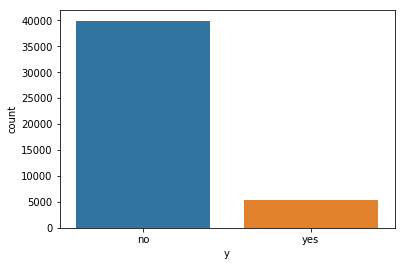

In [53]:
sns.countplot(x="y", data=data);

In [54]:
round(data['y'].value_counts(normalize=True) * 100, 2)

no     88.3
yes    11.7
Name: y, dtype: float64

In [55]:
data = data.drop(columns = ['job', 'marital', 'education','contact', 'month', 'poutcome'])
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,no,2143,yes,no,5,261,1,-1,0,no
1,44,no,29,yes,no,5,151,1,-1,0,no
2,33,no,2,yes,yes,5,76,1,-1,0,no
3,47,no,1506,yes,no,5,92,1,-1,0,no
4,33,no,1,no,no,5,198,1,-1,0,no


In [43]:
data['default'] = data['default'].map( 
                   {'yes':1 ,'no':0}) 
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,NaN,2143,1,0,5,261,1,-1,0,0
1,44,NaN,29,1,0,5,151,1,-1,0,0
2,33,NaN,2,1,1,5,76,1,-1,0,0
3,47,NaN,1506,1,0,5,92,1,-1,0,0
4,33,NaN,1,0,0,5,198,1,-1,0,0


In [56]:
data['default'] = data['default'].map( 
                   {'yes':1 ,'no':0}) 
data['housing'] = data['housing'].map( 
                   {'yes':1 ,'no':0}) 
data['loan'] = data['loan'].map( 
                   {'yes':1 ,'no':0}) 
data['y'] = data['y'].map( 
                   {'yes':1 ,'no':0}) 

In [57]:
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0
4,33,0,1,0,0,5,198,1,-1,0,0


In [58]:
features = data.drop(['y'],axis=1)
target = data['y'].values

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state=42)

In [60]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [61]:
y_predict = lr.predict(X_test)

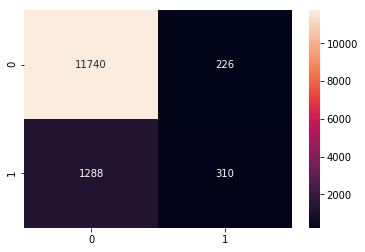

In [62]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='0.0f');

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.58      0.19      0.29      1598

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.61     13564
weighted avg       0.86      0.89      0.86     13564



In [64]:
# import imblearn library and resample the original data using SMOTE technique

from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_smote))

Original dataset shape Counter({0: 27956, 1: 3691})
Resampled dataset shape Counter({0: 27956, 1: 27956})


In [65]:
lr_smote = LogisticRegression()
lr_smote.fit(X_smote, y_smote)

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

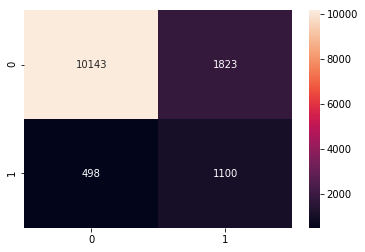

In [66]:
y_predict_smote = lr_smote.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_predict_smote), annot=True, fmt='0.0f');

In [67]:
print(classification_report(y_test, y_predict_smote))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     11966
           1       0.38      0.69      0.49      1598

    accuracy                           0.83     13564
   macro avg       0.66      0.77      0.69     13564
weighted avg       0.89      0.83      0.85     13564



In [70]:
from plot_metric.functions import BinaryClassification

bc = BinaryClassification(y_test, lr_smote.predict_proba(X_test)[:,1],  labels=[0, 1])
plt.figure(figsize=(16, 8))
bc.plot_roc_curve()
plt.show()

ModuleNotFoundError: No module named 'plot_metric'

In [69]:
!pip install BinaryClassification

  Could not find a version that satisfies the requirement BinaryClassification (from versions: )
No matching distribution found for BinaryClassification


In [71]:
import BinaryClassification

ModuleNotFoundError: No module named 'BinaryClassification'

In [72]:
y_pred_proba = lr_smote.predict_proba(X_test)[:,1]

In [73]:
y_pred_labels = (y_pred_proba >= 0.2)

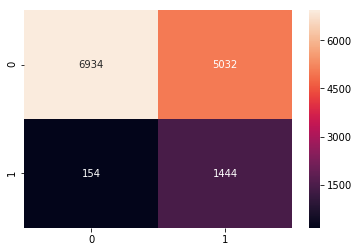

In [74]:
sns.heatmap(confusion_matrix(y_test, y_pred_labels), annot=True, fmt='0.0f');

In [75]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.98      0.58      0.73     11966
           1       0.22      0.90      0.36      1598

    accuracy                           0.62     13564
   macro avg       0.60      0.74      0.54     13564
weighted avg       0.89      0.62      0.68     13564

